<a href="https://colab.research.google.com/github/MarianoNaveyra/DataScience/blob/main/Proyecto_Partell_Naveyra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Abstract:

Este análisis busca detectar los factores claves que influyen en el resultado de un partido de fútbol, tomando como ejemplo la liga inglesa de futbol. Este dataset contiene información detallada sobre partidos de equipos locales y visitantes. Se tienen en cuenta variables como goles, tiros al arco, tarjetas, y faltas para identificar patrones que puedan explicar las diferencias en el rendimiento entre equipos locales y visitantes, así como la relación entre acciones específicas del juego y el resultado final del partido.

Hipótesis:

Los equipos locales tienen más probabilidades de ganar que los equipos visitantes.

La cantidad de tiros al arco está directamente relacionada con el número de goles.


Los equipos visitantes cometen más faltas y reciben más tarjetas que los equipos locales.

Los equipos que terminan el primer tiempo arriba el el marcador, tienen mas chances de ganar el partido.

Preguntas:

¿Cuáles son los factores clave que determinan la victoria de un equipo?

¿Los goles al medio tiempo influyen significativamente en el resultado final del partido?

¿Existen diferencias significativas en el rendimiento de los equipos locales y visitantes?

¿Qué equipo suele realizar más disparos, cometer más faltas o recibir más tarjetas?

¿Existe una relación significativa entre los disparos a puerta y los goles marcados?

¿Es más probable que los equipos que tienen más disparos a puerta marquen más goles?

In [18]:

url = 'https://raw.githubusercontent.com/MarianoNaveyra/DataScience/main/DatasetFutbol.csv'
df = pd.read_csv(url, encoding='ISO-8859-1')
df.head()



,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2000-01,2000-08-19T00:00:00Z,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,...,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
1,2000-01,2000-08-19T00:00:00Z,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2,2000-01,2000-08-19T00:00:00Z,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
3,2000-01,2000-08-19T00:00:00Z,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
4,2000-01,2000-08-19T00:00:00Z,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8289 entries, 0 to 8288
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    8289 non-null   object 
 1   DateTime  8078 non-null   object 
 2   HomeTeam  8078 non-null   object 
 3   AwayTeam  8078 non-null   object 
 4   FTHG      8078 non-null   float64
 5   FTAG      8078 non-null   float64
 6   FTR       8078 non-null   object 
 7   HTHG      8078 non-null   float64
 8   HTAG      8078 non-null   float64
 9   HTR       8078 non-null   object 
 10  Referee   8078 non-null   object 
 11  HS        8078 non-null   float64
 12  AS        8078 non-null   float64
 13  HST       8078 non-null   float64
 14  AST       8078 non-null   float64
 15  HC        8078 non-null   float64
 16  AC        8078 non-null   float64
 17  HF        8078 non-null   float64
 18  AF        8078 non-null   float64
 19  HY        8078 non-null   float64
 20  AY        8078 non-null   floa

In [20]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
count,8078.000000,8078.000000,8078.000000,8078.000000,8078.000000,8078.000000,8078.000000,8078.000000,8078.000000,8078.000000,8078.000000,8078.000000,8078.000000,8078.000000,8078.000000,8078.000000
mean,1.519064,1.155113,0.679995,0.505818,13.543204,10.692622,6.130478,4.781505,6.075514,4.785467,11.355781,11.840555,1.422506,1.748576,0.063011,0.089626
std,1.298973,1.143241,0.830711,0.722584,5.279937,4.594297,3.342681,2.801628,3.096643,2.731545,3.772690,3.941610,1.192658,1.268779,0.253471,0.297967
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,4.000000,3.000000,9.000000,9.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,6.000000,4.000000,11.000000,12.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,13.000000,8.000000,6.000000,8.000000,6.000000,14.000000,14.000000,2.000000,3.000000,0.000000,0.000000
max,9.000000,9.000000,5.000000,5.000000,43.000000,30.000000,24.000000,20.000000,20.000000,19.000000,33.000000,29.000000,7.000000,9.000000,3.000000,2.000000


In [21]:

columns_to_check = ['Season','HomeTeam','AwayTeam','DateTime','Referee', 'FTR', 'HTR']

# Contar cuántos ceros o valores faltantes hay en esas columnas
invalid_values = (df[columns_to_check] == 0).sum() + df[columns_to_check].isna().sum()
print(invalid_values)

Season        0
HomeTeam    211
AwayTeam    211
DateTime    211
Referee     211
FTR         211
HTR         211
dtype: int64


In [22]:
df_cleaned = df.dropna(subset=['Season','HomeTeam','AwayTeam','DateTime','Referee', 'FTR', 'HTR'])


In [23]:
median_HF = df['HF'].median()
median_AF = df['AF'].median()

df['HF'] = df['HF'].replace(0, median_HF)
df['AF'] = df['AF'].replace(0, median_AF)

print(df[['HF', 'AF']].head())


     HF    AF
0  13.0  12.0
1  19.0  14.0
2  15.0  21.0
3  11.0  13.0
4  21.0  20.0


In [24]:
# Definir función para encontrar outliers en todas las columnas numéricas
def find_outliers_IQR(df):
    outlier_indices = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_indices[column] = outliers.index.tolist()
    return outlier_indices

# Encontrar outliers en todas las columnas
outliers_dict = find_outliers_IQR(df)
print("Outliers encontrados en todas las columnas:")
for column, indices in outliers_dict.items():
    print(f"{column}: {indices}")


Outliers encontrados en todas las columnas:
FTHG: [0, 1, 15, 19, 30, 69, 72, 91, 99, 104, 111, 126, 128, 159, 162, 163, 185, 189, 197, 213, 214, 220, 225, 273, 324, 334, 360, 367, 396, 411, 421, 433, 443, 458, 485, 502, 536, 542, 544, 763, 769, 780, 848, 866, 899, 903, 950, 978, 986, 997, 1004, 1009, 1024, 1061, 1064, 1073, 1102, 1123, 1124, 1129, 1142, 1145, 1164, 1182, 1186, 1187, 1206, 1222, 1237, 1254, 1256, 1284, 1287, 1295, 1311, 1336, 1338, 1345, 1375, 1380, 1397, 1415, 1426, 1430, 1433, 1442, 1446, 1448, 1467, 1491, 1496, 1517, 1518, 1522, 1538, 1548, 1552, 1558, 1589, 1610, 1617, 1641, 1646, 1672, 1690, 1693, 1694, 1696, 1729, 1755, 1786, 1812, 1819, 1835, 1837, 1860, 1863, 1873, 1875, 1889, 1893, 1923, 1926, 1945, 1976, 1998, 2000, 2008, 2021, 2057, 2061, 2067, 2076, 2077, 2088, 2104, 2114, 2130, 2137, 2148, 2179, 2187, 2192, 2205, 2208, 2224, 2248, 2270, 2276, 2289, 2323, 2363, 2390, 2438, 2439, 2443, 2459, 2494, 2496, 2501, 2512, 2525, 2549, 2551, 2555, 2571, 2582, 2583, 25

In [25]:
# Reemplazar outliers por la mediana
df_replaced = df.copy()  # Hacer una copia del DataFrame original
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = df[column].median()

    # Reemplazar outliers
    df_replaced.loc[df_replaced[column] < lower_bound, column] = median_value
    df_replaced.loc[df_replaced[column] > upper_bound, column] = median_value

print("DataFrame después de reemplazar outliers por la mediana:")
print(df_replaced.describe())


DataFrame después de reemplazar outliers por la mediana:
              FTHG         FTAG         HTHG         HTAG           HS  \
count  8078.000000  8078.000000  8078.000000  8078.000000  8078.000000   
mean      1.254395     1.140257     0.574523     0.452711    13.329166   
std       0.952260     1.110246     0.693327     0.633496     4.918498   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     0.000000     0.000000    10.000000   
50%       1.000000     1.000000     0.000000     0.000000    13.000000   
75%       2.000000     2.000000     1.000000     1.000000    16.000000   
max       3.000000     5.000000     2.000000     2.000000    27.000000   

                AS          HST          AST           HC           AC  \
count  8078.000000  8078.000000  8078.000000  8078.000000  8078.000000   
mean     10.479079     5.938103     4.461748     5.963729     4.505076   
std       4.258660     3.012932     2.339875     2.905

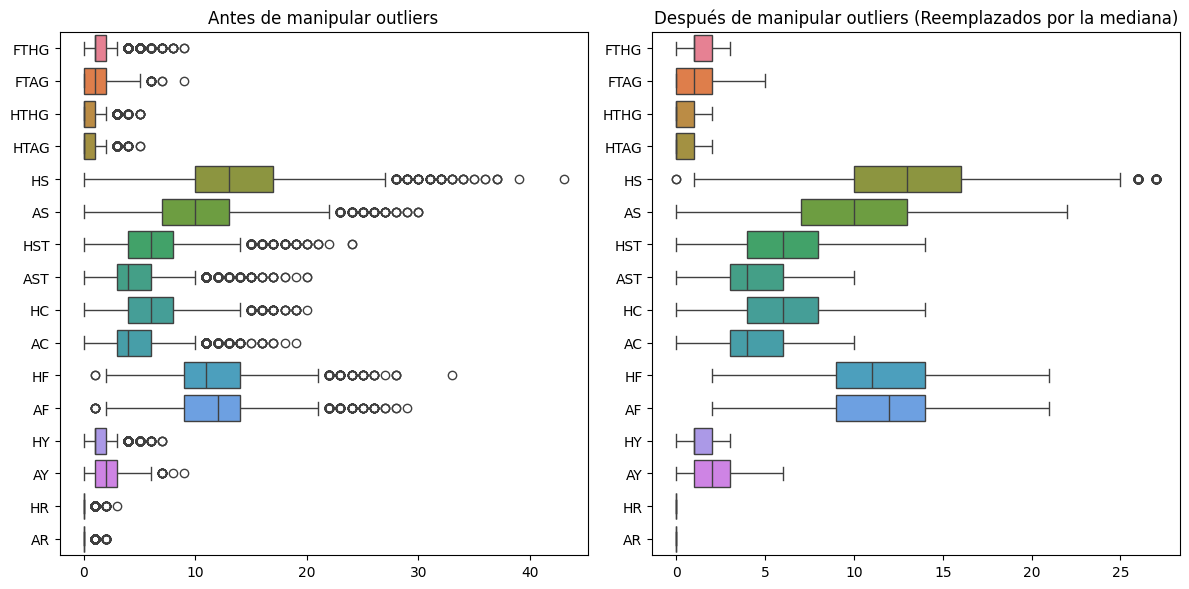

In [26]:
# Visualizar boxplot antes y después de manejar outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, orient="h")
plt.title("Antes de manipular outliers")

plt.subplot(1, 2, 2)
sns.boxplot(data=df_replaced, orient="h")
plt.title("Después de manipular outliers (Reemplazados por la mediana)")

plt.tight_layout()
plt.show()


In [27]:
import pandas as pd

# Eliminamos la columna 'DateTime'
df_cleaned = df_cleaned.drop(columns=['DateTime'])

# Creamos un DataFrame con los equipos como local
home_stats = df_cleaned.groupby(['Season', 'HomeTeam']).agg(
    home_matches=('HomeTeam', 'size'),
    home_wins=('FTR', lambda x: (x == 'H').sum()),
    home_goals_for=('FTHG', 'sum'),
    home_goals_against=('FTAG', 'sum')
).reset_index()

# Creamos un DataFrame con los equipos como visitante
away_stats = df_cleaned.groupby(['Season', 'AwayTeam']).agg(
    away_matches=('AwayTeam', 'size'),
    away_wins=('FTR', lambda x: (x == 'A').sum()),
    away_goals_for=('FTAG', 'sum'),
    away_goals_against=('FTHG', 'sum')
).reset_index()

# Renombramos las columnas de los equipos para evitar conflictos al unir
home_stats = home_stats.rename(columns={'HomeTeam': 'Team'})
away_stats = away_stats.rename(columns={'AwayTeam': 'Team'})

# Unimos ambas métricas en un único DataFrame, combinando por temporada y equipo
team_stats = pd.merge(home_stats, away_stats, on=['Season', 'Team'], how='outer').fillna(0)

# Calculamos métricas adicionales
team_stats['total_matches'] = team_stats['home_matches'] + team_stats['away_matches']
team_stats['total_wins'] = team_stats['home_wins'] + team_stats['away_wins']
team_stats['win_percentage'] = team_stats['total_wins'] / team_stats['total_matches']
team_stats['goals_for'] = team_stats['home_goals_for'] + team_stats['away_goals_for']
team_stats['goals_against'] = team_stats['home_goals_against'] + team_stats['away_goals_against']
team_stats['goal_difference'] = team_stats['goals_for'] - team_stats['goals_against']

# Visualizamos el DataFrame resultante
print(team_stats[['Season', 'Team', 'total_matches', 'total_wins', 'win_percentage', 'goals_for', 'goals_against', 'goal_difference']].head())


    Season         Team  total_matches  total_wins  win_percentage  goals_for  \
0  2000-01      Arsenal             38          20        0.526316       63.0   
1  2000-01  Aston Villa             38          13        0.342105       46.0   
2  2000-01     Bradford             38           5        0.131579       30.0   
3  2000-01     Charlton             38          14        0.368421       50.0   
4  2000-01      Chelsea             38          17        0.447368       68.0   

   goals_against  goal_difference  
0           38.0             25.0  
1           43.0              3.0  
2           70.0            -40.0  
3           57.0             -7.0  
4           45.0             23.0  


In [ ]:
df['FTHG'] = pd.to_numeric(df['FTHG'], errors='coerce')
df['FTAG'] = pd.to_numeric(df['FTAG'], errors='coerce')
df['HST'] = pd.to_numeric(df['HST'], errors='coerce')
df['AST'] = pd.to_numeric(df['AST'], errors='coerce')

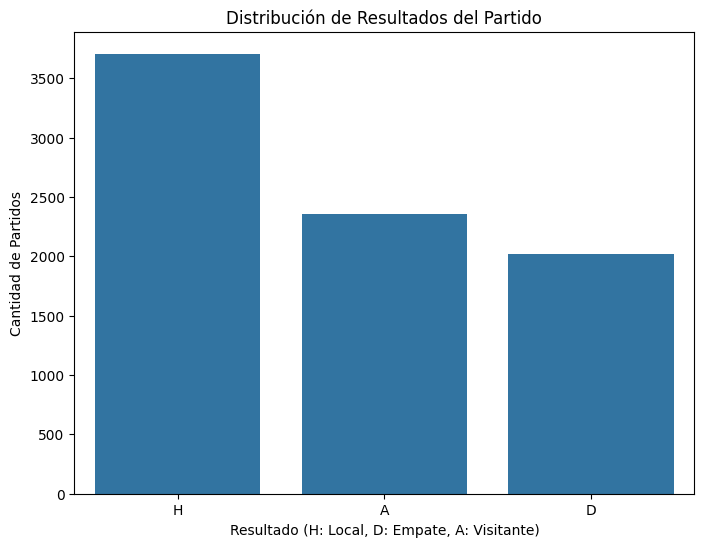

In [28]:
# Gráfico 1: Distribución de los resultados del partido (Local, Empate, Visitante)
plt.figure(figsize=(8,6))
sns.countplot(x='FTR', data=df)  # Sin el argumento palette
plt.title('Distribución de Resultados del Partido')
plt.xlabel('Resultado (H: Local, D: Empate, A: Visitante)')
plt.ylabel('Cantidad de Partidos')
plt.show()

A partir de este gráfico, la hipótesis de que los equipos locales tienen más probabilidades de ganar que los equipos visitantes está respaldada. El número de victorias locales es considerablemente más alto que el de visitantes, lo que sugiere una ventaja para los equipos que juegan en casa.

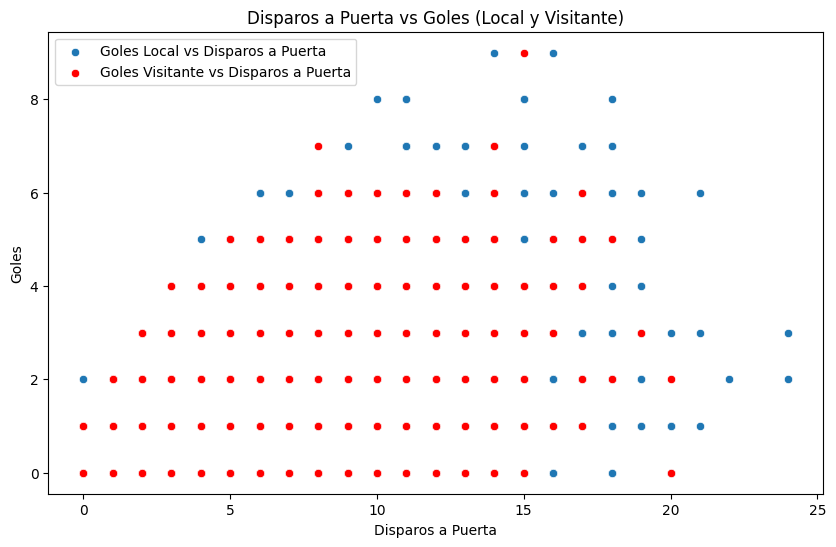

In [29]:
# Gráfico 2: Relación entre los Disparos a Puerta y Goles
plt.figure(figsize=(10,6))
sns.scatterplot(x='HST', y='FTHG', data=df, label='Goles Local vs Disparos a Puerta')
sns.scatterplot(x='AST', y='FTAG', data=df, label='Goles Visitante vs Disparos a Puerta', color='red')
plt.title('Disparos a Puerta vs Goles (Local y Visitante)')
plt.xlabel('Disparos a Puerta')
plt.ylabel('Goles')
plt.legend()
plt.show()

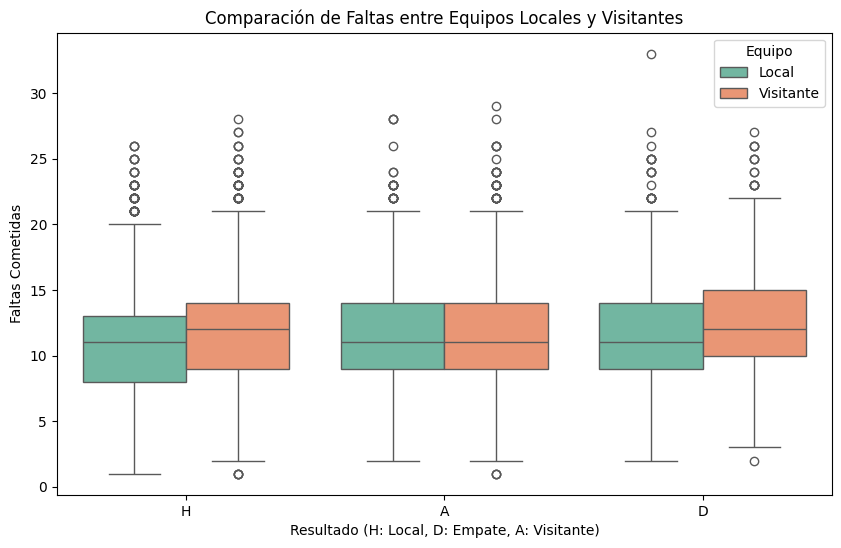

In [30]:
# Crear un DataFrame en formato 'long' para faltas cometidas por local y visitante
df_melted_fouls = df.melt(id_vars=['FTR'], value_vars=['HF', 'AF'],
                           var_name='Equipo', value_name='Faltas Cometidas')

# Etiquetas más descriptivas para 'Equipo'
df_melted_fouls['Equipo'] = df_melted_fouls['Equipo'].replace({'HF': 'Local', 'AF': 'Visitante'})

# Crear gráfico de caja
plt.figure(figsize=(10,6))
sns.boxplot(x='FTR', y='Faltas Cometidas', hue='Equipo', data=df_melted_fouls, palette='Set2')

plt.title('Comparación de Faltas entre Equipos Locales y Visitantes')
plt.xlabel('Resultado (H: Local, D: Empate, A: Visitante)')
plt.ylabel('Faltas Cometidas')
plt.legend(title='Equipo')
plt.show()


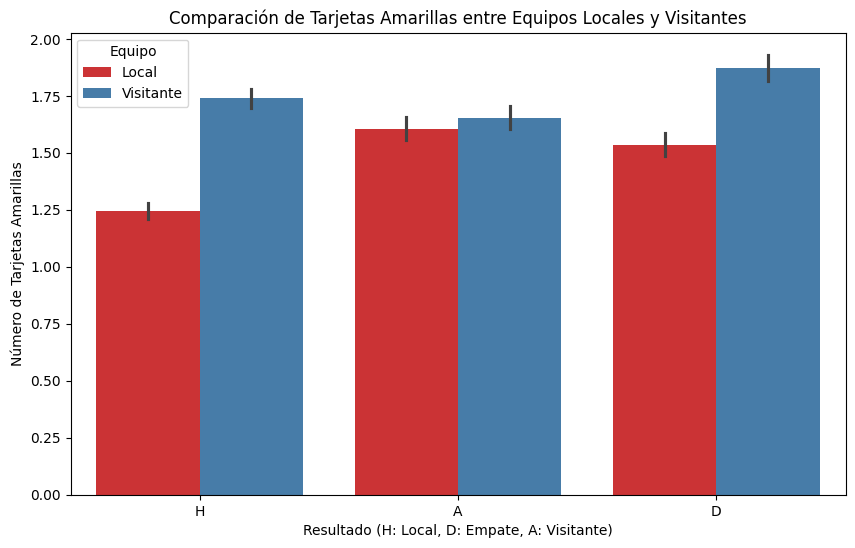

In [31]:
# Crear un DataFrame en formato 'long' para tarjetas amarillas de local y visitante
df_melted = df.melt(id_vars=['FTR'], value_vars=['HY', 'AY'],
                    var_name='Equipo', value_name='Tarjetas Amarillas')

# Etiquetas más descriptivas para 'Equipo'
df_melted['Equipo'] = df_melted['Equipo'].replace({'HY': 'Local', 'AY': 'Visitante'})

# Crear gráfico de barras con hue para separar local y visitante
plt.figure(figsize=(10,6))
sns.barplot(x='FTR', y='Tarjetas Amarillas', hue='Equipo', data=df_melted, palette='Set1')

plt.title('Comparación de Tarjetas Amarillas entre Equipos Locales y Visitantes')
plt.xlabel('Resultado (H: Local, D: Empate, A: Visitante)')
plt.ylabel('Número de Tarjetas Amarillas')
plt.legend(title='Equipo')
plt.show()

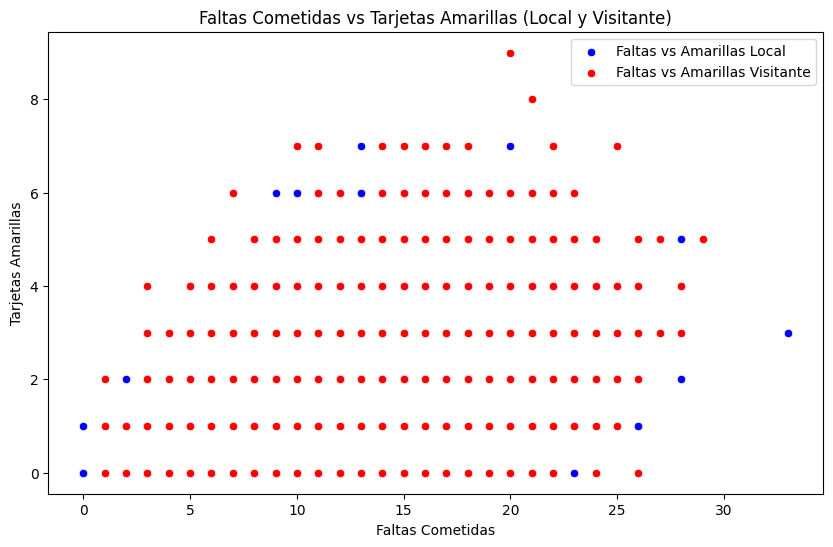

In [ ]:
# Gráfico 5: Faltas Cometidas vs Tarjetas Amarillas
plt.figure(figsize=(10,6))
sns.scatterplot(x='HF', y='HY', data=df, label='Faltas vs Amarillas Local', color='blue')
sns.scatterplot(x='AF', y='AY', data=df, label='Faltas vs Amarillas Visitante', color='red')
plt.title('Faltas Cometidas vs Tarjetas Amarillas (Local y Visitante)')
plt.xlabel('Faltas Cometidas')
plt.ylabel('Tarjetas Amarillas')
plt.legend()
plt.show()


In [32]:
# Unimos las métricas del equipo local con el DataFrame original
df_with_home_stats = pd.merge(df_cleaned, team_stats, left_on=['Season', 'HomeTeam'], right_on=['Season', 'Team'], how='left')
df_with_home_stats = df_with_home_stats.rename(columns={
    'total_matches': 'home_total_matches',
    'total_wins': 'home_total_wins',
    'win_percentage': 'home_win_percentage',
    'goals_for': 'home_goals_for',
    'goals_against': 'home_goals_against',
    'goal_difference': 'home_goal_difference'
}).drop(columns=['Team'])

# Unimos las métricas del equipo visitante
df_with_full_stats = pd.merge(df_with_home_stats, team_stats, left_on=['Season', 'AwayTeam'], right_on=['Season', 'Team'], how='left')
df_with_full_stats = df_with_full_stats.rename(columns={
    'total_matches': 'away_total_matches',
    'total_wins': 'away_total_wins',
    'win_percentage': 'away_win_percentage',
    'goals_for': 'away_goals_for',
    'goals_against': 'away_goals_against',
    'goal_difference': 'away_goal_difference'
}).drop(columns=['Team'])

# Visualizamos el DataFrame con las métricas
print(df_with_full_stats[['Season', 'HomeTeam', 'AwayTeam', 'home_win_percentage', 'away_win_percentage', 'home_goal_difference', 'away_goal_difference']].head())


    Season  HomeTeam       AwayTeam  home_win_percentage  away_win_percentage  \
0  2000-01  Charlton       Man City             0.368421             0.210526   
1  2000-01   Chelsea       West Ham             0.447368             0.263158   
2  2000-01  Coventry  Middlesbrough             0.210526             0.236842   
3  2000-01     Derby    Southampton             0.263158             0.368421   
4  2000-01     Leeds        Everton             0.526316             0.289474   

   home_goal_difference  away_goal_difference  
0                  -7.0                 -24.0  
1                  23.0                  -5.0  
2                 -27.0                   0.0  
3                 -22.0                  -8.0  
4                  21.0                 -14.0  


In [33]:
# Codificamos la columna FTR como variable objetivo (target)
df_with_full_stats['target'] = df_with_full_stats['FTR'].map({'H': 1, 'D': 0, 'A': -1})

# Visualizamos los datos finales para entrenamiento
print(df_with_full_stats[['HomeTeam', 'AwayTeam', 'home_win_percentage', 'away_win_percentage', 'home_goal_difference', 'away_goal_difference', 'target']].head())


   HomeTeam       AwayTeam  home_win_percentage  away_win_percentage  \
0  Charlton       Man City             0.368421             0.210526   
1   Chelsea       West Ham             0.447368             0.263158   
2  Coventry  Middlesbrough             0.210526             0.236842   
3     Derby    Southampton             0.263158             0.368421   
4     Leeds        Everton             0.526316             0.289474   

   home_goal_difference  away_goal_difference  target  
0                  -7.0                 -24.0       1  
1                  23.0                  -5.0       1  
2                 -27.0                   0.0      -1  
3                 -22.0                  -8.0       0  
4                  21.0                 -14.0       1  


In [34]:
from sklearn.model_selection import train_test_split

# Seleccionamos las características que usaremos para el modelo
features = ['home_win_percentage', 'away_win_percentage', 'home_goal_difference', 'away_goal_difference']

# Definimos X (features) y y (target)
X = df_with_full_stats[features]
y = df_with_full_stats['target']

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Entrenamos un modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predecimos sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluamos la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.49
